In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('serial_killers.csv')
df.head()

Name                                  Country   
0           Luis Garavito       Colombia  Ecuador[3]  Venezuela[3]  \
1             Pedro López                  Colombia  Peru  Ecuador   
2             Javed Iqbal                                 Pakistan   
3          Mikhail Popkov                                   Russia   
4  Daniel Camargo Barbosa  Colombia  Ecuador  Brazil (alleged)[13]   

   Years active Proven victims Possible victims   
0  1992–1999[3]            193         193–300+  \
1     1969–1980            110             300+   
2     1998–1999            100              100   
3     1992–2010             78              83+   
4     1974–1986             72          180[13]   

                                               Notes  
0  Child-murderer, torture-killer, and rapist kno...  
1  Child-murderer and rapist, known as "The Monst...  
2  Child-murderer and rapist, known as "Kukri", I...  
3  Serial rapist-killer nicknamed "The Werewolf",...  
4  Child and woman murderer, believed to have pos...

In [3]:
print(f'The dataset has a shape of {df.shape}')
print('\n')
print(f'The dataset has {df.isnull().sum().sum()} missing values')
print('\n')
print(f'The dataset has {df.duplicated().sum()} duplicated rows')

The dataset has a shape of (1531, 6)


The dataset has 0 missing values


The dataset has 0 duplicated rows


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1531 entries, 0 to 1530
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              1531 non-null   object
 1   Country           1531 non-null   object
 2   Years active      1531 non-null   object
 3   Proven victims    1531 non-null   object
 4   Possible victims  1531 non-null   object
 5   Notes             1531 non-null   object
dtypes: object(6)
memory usage: 71.9+ KB


# EDA

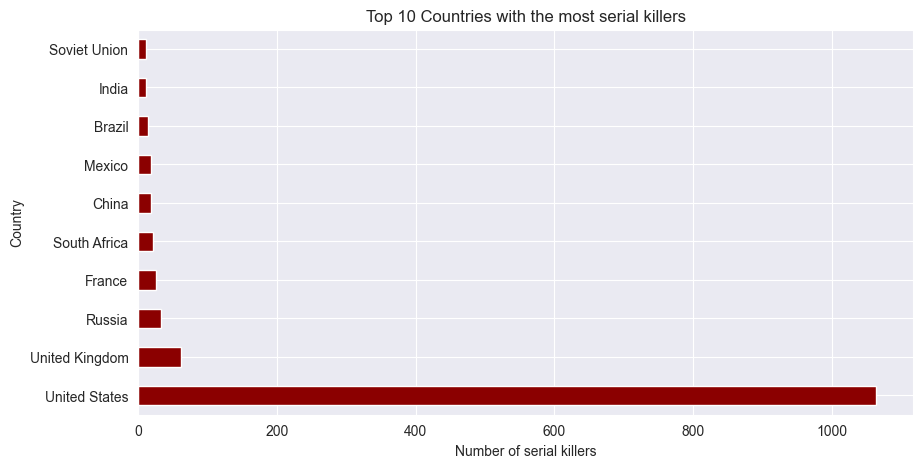

In [5]:
# Number of serial killers by country
df['Country'].value_counts().head(10).plot(kind='barh', figsize=(10, 5), color='darkred')
plt.title('Top 10 Countries with the most serial killers')
plt.xlabel('Number of serial killers')
plt.ylabel('Country')
plt.show();

In [10]:
# Number of serial killers
df['Name'].unique()

array(['Luis Garavito', 'Pedro López', 'Javed Iqbal', ..., 'Malachi Uwem',
       'Roberto José Carmona', 'Mario Alberto Berrios Muñoz'],
      dtype=object)

In [11]:
# Number of serial killers
df['Name'].nunique()

1501

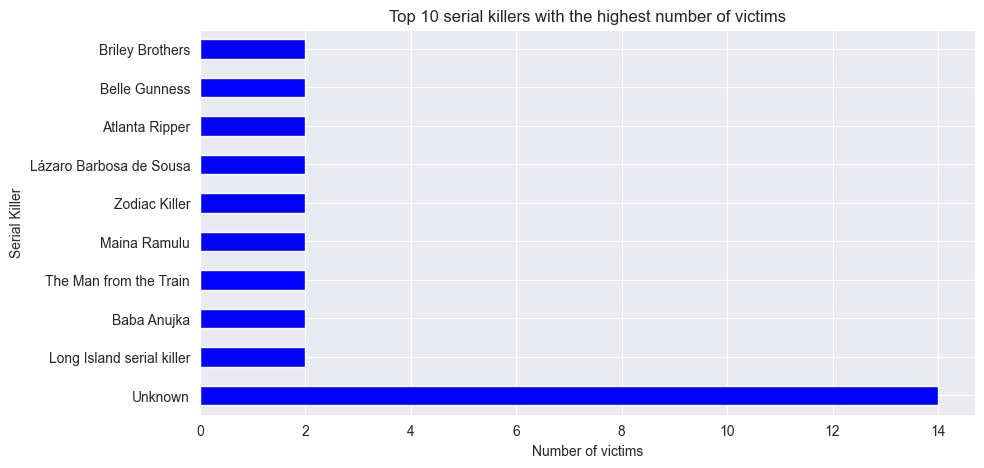

In [25]:
# Number of serial killers by victims
df['Name'].value_counts().head(10).plot(kind='barh', figsize=(10, 5), color='blue')
plt.title('Top 10 serial killers with the highest number of victims')
plt.xlabel('Number of victims')
plt.ylabel('Serial Killer')
plt.show();

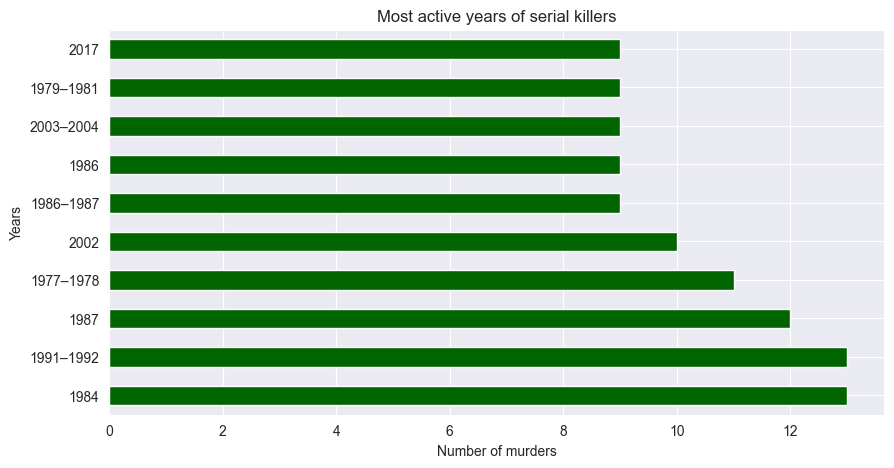

In [28]:
# Most active years
df['Years active'].value_counts().head(10).plot(kind='barh', figsize=(10, 5), color='darkgreen')
plt.title('Most active years of serial killers')
plt.xlabel('Number of murders')
plt.ylabel('Years')
plt.show();


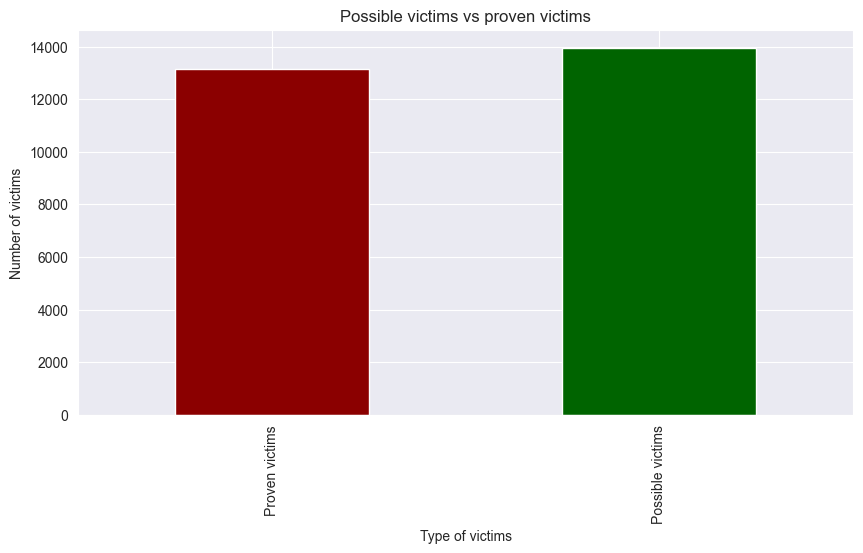

In [35]:
# Possible victims vs proven victims
df[['Proven victims', 'Possible victims']] = df[['Proven victims', 'Possible victims']].apply(pd.to_numeric, errors='coerce')
df[['Proven victims', 'Possible victims']].sum().plot(kind='bar', figsize=(10, 5), color=['darkred', 'darkgreen'])
plt.title('Possible victims vs proven victims')
plt.xlabel('Type of victims')
plt.ylabel('Number of victims')
plt.show();

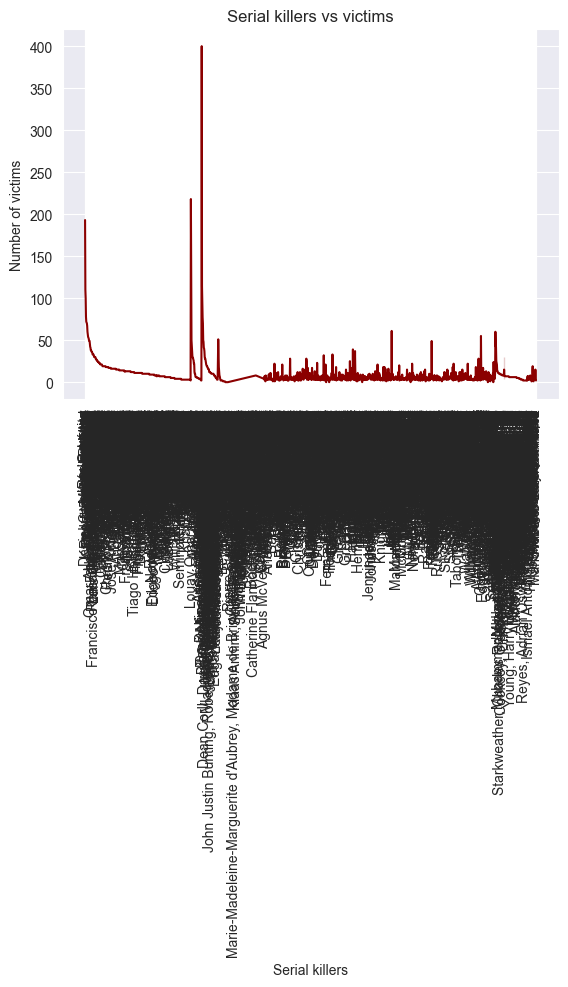

In [39]:
# Serial killers vs victims
sns.lineplot(x='Name', y='Proven victims', data=df, color='darkred')
plt.xticks(rotation=90)
plt.title('Serial killers vs victims')
plt.xlabel('Serial killers')
plt.ylabel('Number of victims')
plt.show();

In [40]:
# Serial killers in the USA
sk_usa = df.query('Country == "United States"')
sk_usa.head()

Name        Country Years active  Proven victims   
8      Samuel Little  United States    1970–2005            60.0  \
14      Gary Ridgway  United States    1982–2000            49.0   
26   John Wayne Gacy  United States    1972–1978            33.0   
42       Juan Corona  United States         1971            25.0   
47  Ronald Dominique  United States    1997–2006            23.0   

    Possible victims                                              Notes  
8               93.0  Little was convicted of killing three women, b...  
14               NaN  Ridgway was a truck painter who confessed to k...  
26               NaN  Gacy is known to have murdered a minimum of 33...  
42               NaN  Corona was convicted of murdering ranch labore...  
47               NaN  Louisianian serial killer, known locally as th...

<Axes: ylabel='Name'>

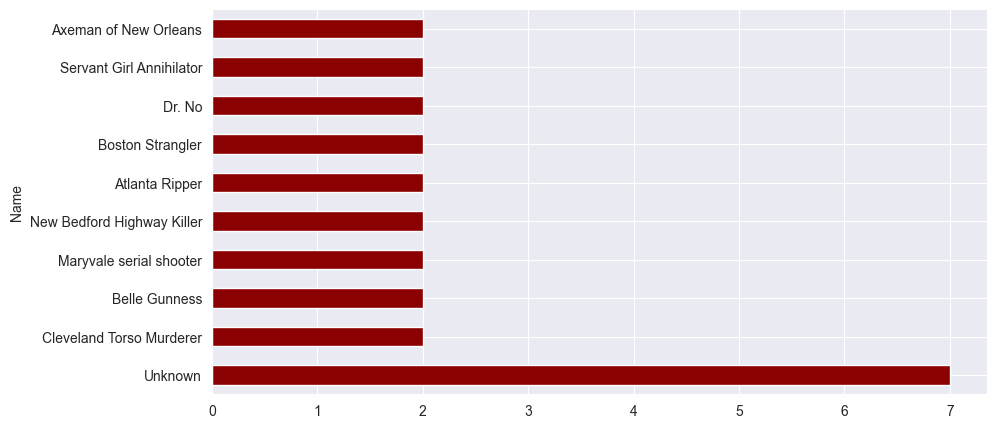

In [43]:
# Highest count
sk_usa['Name'].value_counts().head(10).plot(kind='barh', figsize=(10, 5), color='darkred')

Text(0.5, 1.0, 'John Wayne Gacy active years')

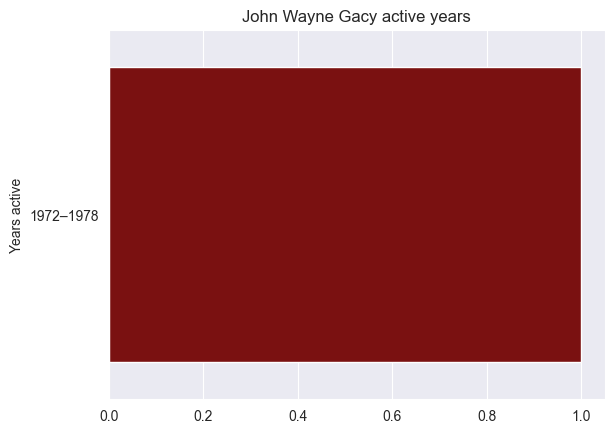

In [51]:
gacy =  sk_usa.query('Name == "John Wayne Gacy"')
x = gacy['Years active'].value_counts().head(10)
sns.barplot(x = x.values, y=x.index, color='darkred')
plt.title('John Wayne Gacy active years')

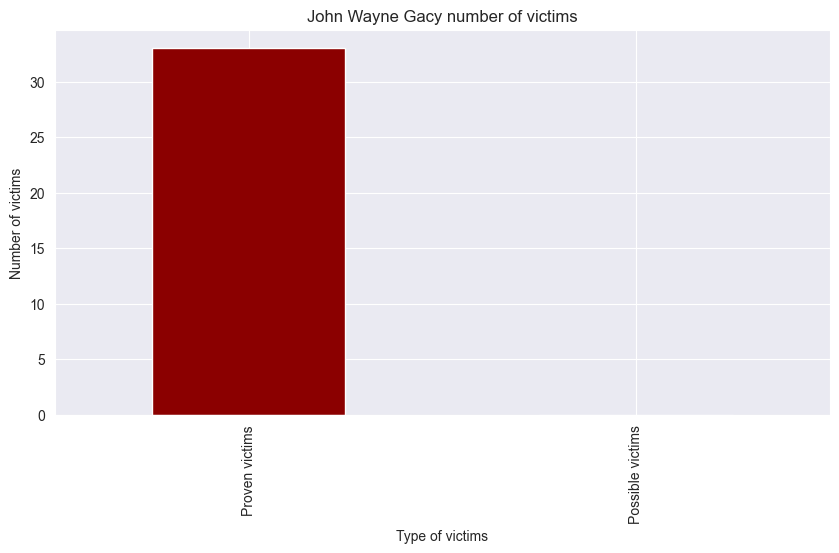

In [52]:
# Gacy number of victims both proven and possible
gacy[['Proven victims', 'Possible victims']].sum().plot(kind='bar', figsize=(10, 5), color=['darkred', 'darkgreen'])
plt.title('John Wayne Gacy number of victims')
plt.xlabel('Type of victims')
plt.ylabel('Number of victims')
plt.show();

In [53]:
# Zodiac killer
zodiac = sk_usa.query('Name == "Zodiac Killer"')
zodiac

Name        Country Years active  Proven victims   
285   Zodiac Killer  United States    1968–1969             5.0  \
1379  Zodiac Killer  United States    1968–1974             5.0   

      Possible victims                                              Notes  
285               37.0  Targeted young couples. Remains unsolved but o...  
1379              37.0  Targeted young couples. Remains unsolved but o...

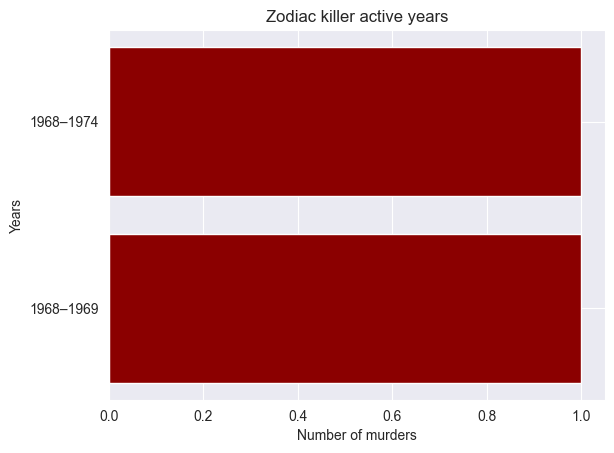

In [54]:
# Zodiac killer active years
plt.barh(zodiac['Years active'].value_counts().head(10).index, zodiac['Years active'].value_counts().head(10).values, color='darkred')
plt.title('Zodiac killer active years')
plt.xlabel('Number of murders')
plt.ylabel('Years')
plt.show();

### Sentiment analysis

                                              0.0/151.4 kB ? eta -:--:--
     -------                                 30.7/151.4 kB 1.3 MB/s eta 0:00:01
     ----------                            41.0/151.4 kB 487.6 kB/s eta 0:00:01
     ----------                            41.0/151.4 kB 487.6 kB/s eta 0:00:01
     ---------------                       61.4/151.4 kB 297.7 kB/s eta 0:00:01
     ----------------------                92.2/151.4 kB 374.1 kB/s eta 0:00:01
     ------------------------             102.4/151.4 kB 368.6 kB/s eta 0:00:01
     -----------------------------        122.9/151.4 kB 359.9 kB/s eta 0:00:01
     -----------------------------        122.9/151.4 kB 359.9 kB/s eta 0:00:01
     -----------------------------        122.9/151.4 kB 359.9 kB/s eta 0:00:01
     -----------------------------        122.9/151.4 kB 359.9 kB/s eta 0:00:01
     ----------------------------------   143.4/151.4 kB 250.2 kB/s eta 0:00:01
     ----------------------------------   143.4

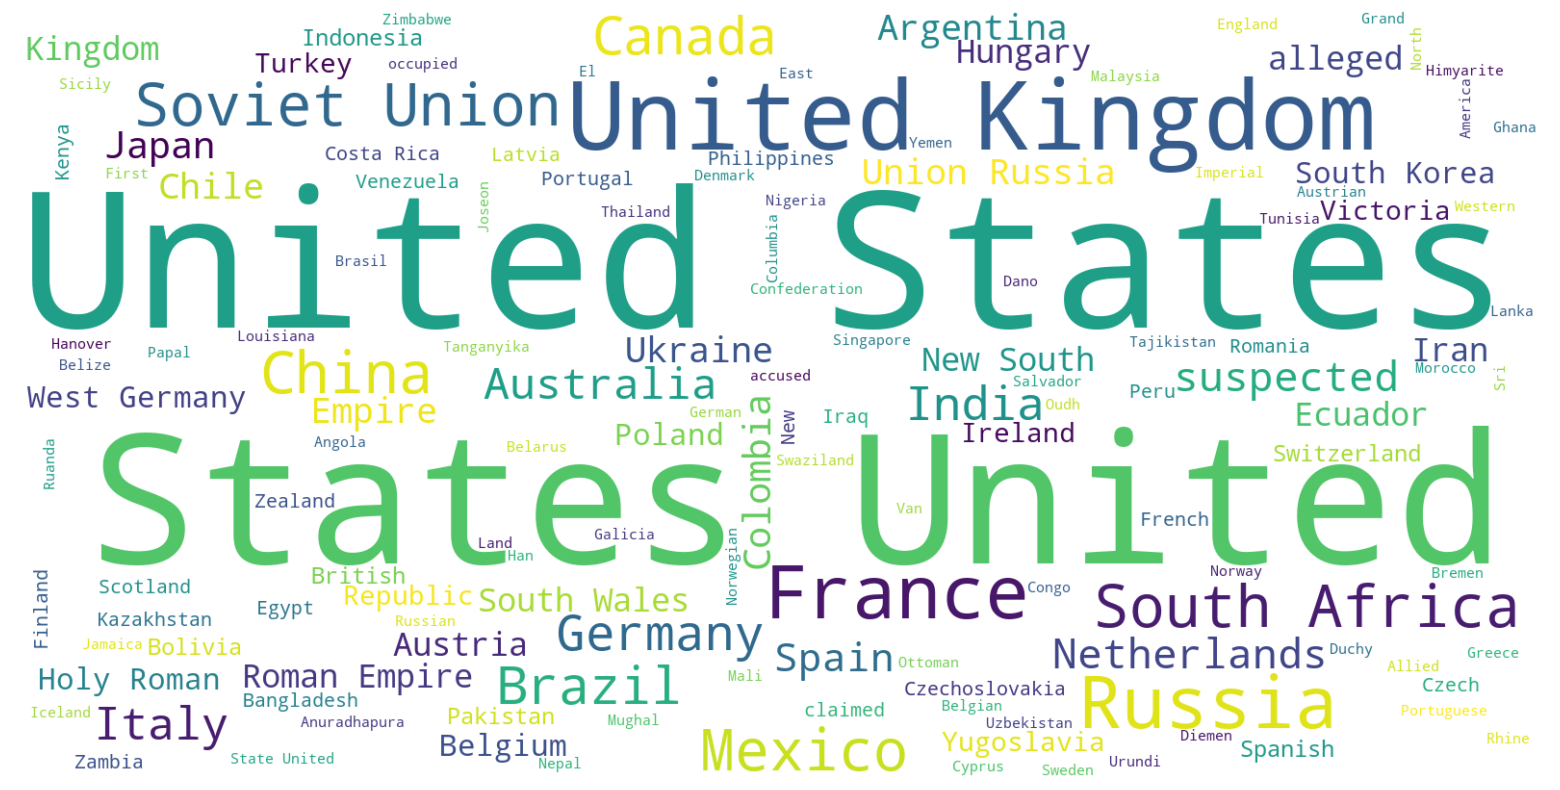

In [56]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wc = WordCloud(background_color='white', max_words=2000, width=1600, height=800)
wc.generate(' '.join(df['Country']))
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show();

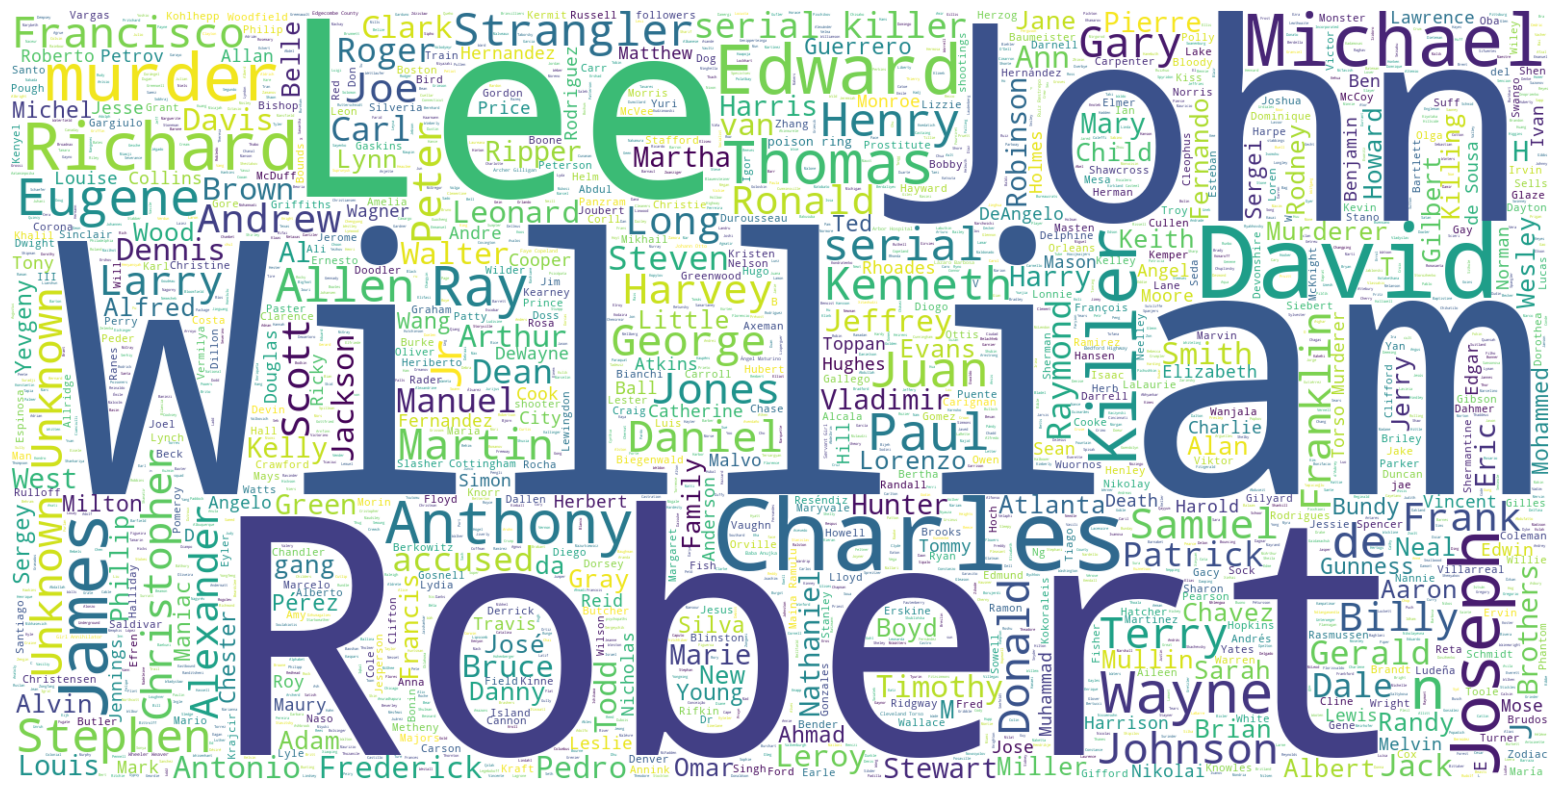

In [59]:
# Serial killers
wc.generate(' '.join(df['Name']))
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show();

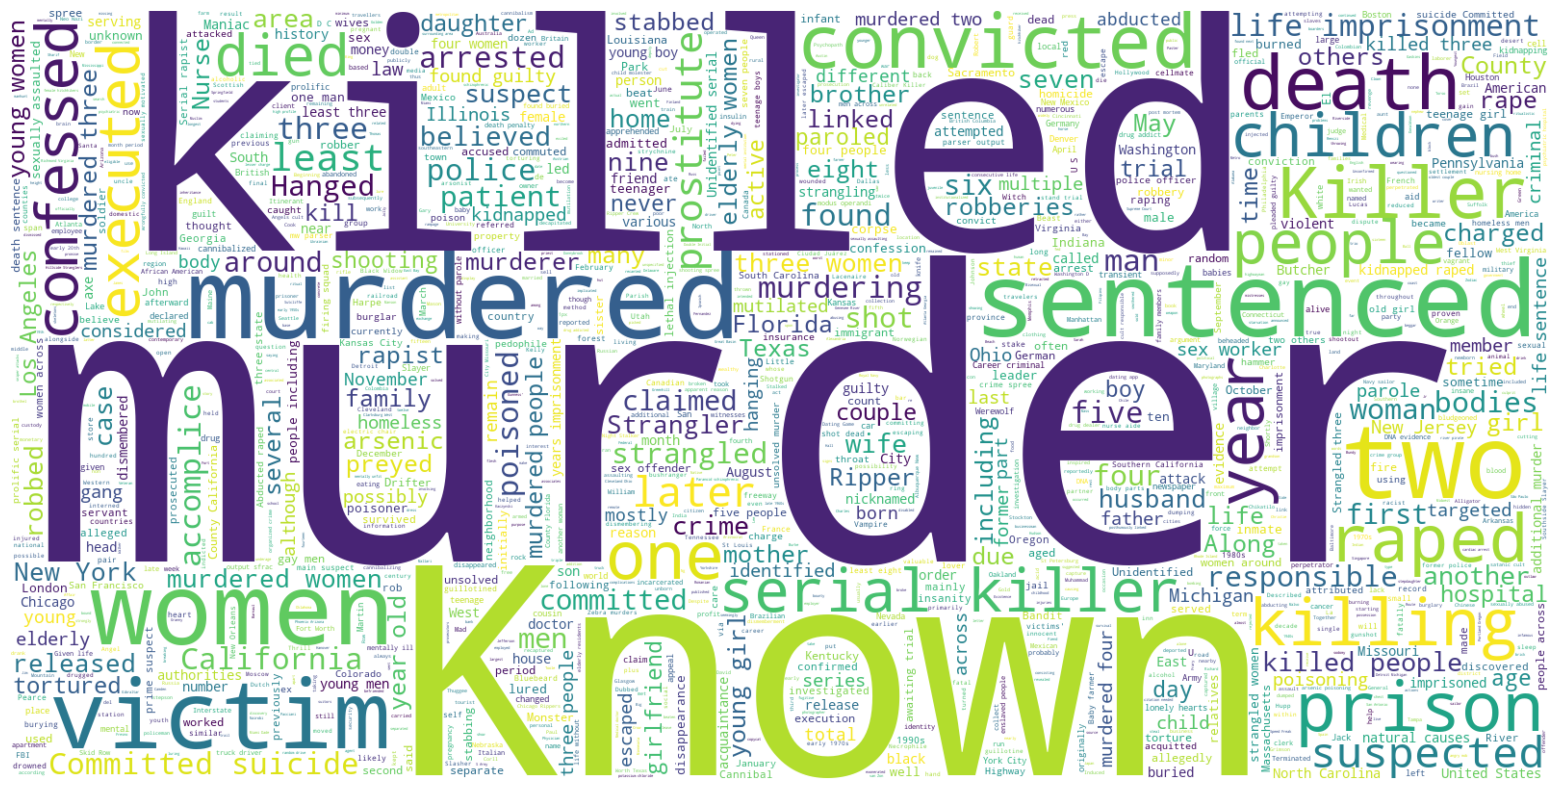

In [60]:
# Notes
wc.generate(' '.join(df['Notes']))
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show();

                                              0.0/1.5 MB ? eta -:--:--
                                              0.0/1.5 MB ? eta -:--:--
                                              0.0/1.5 MB ? eta -:--:--
                                              0.0/1.5 MB ? eta -:--:--
     --                                       0.1/1.5 MB 381.3 kB/s eta 0:00:04
     --                                       0.1/1.5 MB 467.6 kB/s eta 0:00:03
     --                                       0.1/1.5 MB 467.6 kB/s eta 0:00:03
     ---                                      0.1/1.5 MB 425.3 kB/s eta 0:00:04
     -----                                    0.2/1.5 MB 518.8 kB/s eta 0:00:03
     ------                                   0.2/1.5 MB 578.7 kB/s eta 0:00:03
     ------                                   0.2/1.5 MB 578.7 kB/s eta 0:00:03
     -------                                  0.3/1.5 MB 535.8 kB/s eta 0:00:03
     ---------                                0.3/1.5 MB 600.2 kB/s eta 0:00

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...


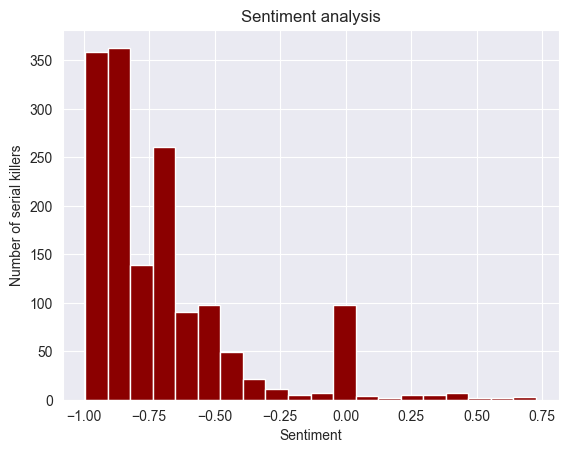

In [61]:
# Sentiment analysis model
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

df['Notes'] = df['Notes'].astype(str)
df['Notes'] = df['Notes'].apply(lambda x: x.replace('nan', ''))

df['sentiment'] = df['Notes'].apply(lambda x: sid.polarity_scores(x))
df = pd.concat([df.drop(['sentiment'], axis=1), df['sentiment'].apply(pd.Series)], axis=1)

df.head()

# Positive, negative and neutral
df['compound'].plot(kind='hist', bins=20, color='darkred')
plt.title('Sentiment analysis')
plt.xlabel('Sentiment')
plt.ylabel('Number of serial killers')
plt.show();